<a href="https://colab.research.google.com/github/fergogu27-ctrl/EDPII/blob/main/Prueba_de_Frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prueba de Frecuencias**

Es una prueba que nos sirve para verificar que la muestra $x_i$ proviene de una distrubución $U(0,1)$

In [10]:
import scipy.stats as st    #calcular el valor de l estadistico za/2 distribuciones de probabilidad y estadística
import numpy as np          #Cálculo numérico y manejo de arreglos (vectores/matrices)
import tabulate             #Imprime tablas
import matplotlib.pyplot as plt   #Nos ayuda a graficar
from scipy.stats import chi2

Prueba estadisticas para los números pseudoaleatorios.
Para esto podemos plantear una prueba de frecuencias donde consiste en dividir el intervalo (0,1) en n subintervarlos

Establecemos una hipotesis nula $H_0$ la cual se debe de probar y una hipotesis alternativa  $H_a$ (hipotesis de investigación) describira lo que se concluirá si se rechaza la hipotesis nula

Las hipotesis son:

Los datos proviene de :

Hipotesis nula: $$H_0:X_n \sim U  (0,1)$$

Los datos  no proviene de :

Hipotesis alternativa: $$H_a:  X_n \nsim U  (0,1)$$

In [11]:
data = [     #Ingresamos lo datos de la tabla 3.1
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79118, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73485, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]


Ahora vamos a calular la Prueba de Frecuencias con los apuntes proporcionados en clase.

In [12]:
intervalos = [(0,0.2), (0.2,0.4), (0.4,0.6), (0.6,0.8), (0.8,1.0)] #Definimos los intervalos como lo vimos en clase n= 5
k = len(intervalos)                                                #Guardamos los itervalos
N = len(data)                                                      #Guardamos los datos

Frecuencia observada $f_o$

In [13]:
fo = [0]*k    # Indicamos cuantos datos caen en cada intervalo
for x in data:
    for i, (a,b) in enumerate(intervalos):    #Ya que tengo los datos, los coloco en el intervalo que corresponden
        if (a <= x < b) or (i == k-1 and x == b):
            fo[i] += 1      #El ultimo intervalo contemplamos el 1
            break

Para la frecuencia esperada $f_e$

Para uniforme: $$f_e=\frac{N}{k}$$

In [14]:
fe = [N/k]*k    #Definimos la función

En la prueba de frecuncias, el estadístico es: $$X^2=\sum  \frac{({f_o-f_e})^2}{f_e}$$

In [15]:
x_p = []  #Definimos la funcion del estadistico

for i in range(k):
    valor = (fo[i] - fe[i])**2 / fe[i]
    x_p.append(valor)
x2 = sum(x_p)     #Damos la sumatoria total de x^2

In [16]:
tabla = []    #Construimos nuestra tabla

for i in range(k):    #Indicamos la lista de filas
    a, b = intervalos[i]
    tabla.append([
        f"[{a:.1f}, {b:.1f})" if i < k-1 else f"[{a:.1f}, {b:.1f}]",
        fo[i],
        round(fe[i], 2),
        round(x_p[i], 4)
    ])

Imprimimos nuestra tabla con los datos previamenete calculados, vemos la frecuencia esperada es de 20 en cada intervalo y nos indica las frecuencias observadas para cada intervalo.

In [17]:
encabezados = ["Intervalo", "fo", "fe", "(fo-fe)^2 / fe"]

print(tabulate.tabulate(tabla, headers=encabezados, tablefmt="fancy_grid"))
print("\nX^2 =", round(x2, 4))


╒═════════════╤══════╤══════╤══════════════════╕
│ Intervalo   │   fo │   fe │   (fo-fe)^2 / fe │
╞═════════════╪══════╪══════╪══════════════════╡
│ [0.0, 0.2)  │   21 │   20 │             0.05 │
├─────────────┼──────┼──────┼──────────────────┤
│ [0.2, 0.4)  │   22 │   20 │             0.2  │
├─────────────┼──────┼──────┼──────────────────┤
│ [0.4, 0.6)  │   19 │   20 │             0.05 │
├─────────────┼──────┼──────┼──────────────────┤
│ [0.6, 0.8)  │   23 │   20 │             0.45 │
├─────────────┼──────┼──────┼──────────────────┤
│ [0.8, 1.0]  │   15 │   20 │             1.25 │
╘═════════════╧══════╧══════╧══════════════════╛

X^2 = 2.0


In [23]:
alpha = 0.05              # nivel de significancia indicado en el libro como valor arbitario
gl = k - 1                # grados de libertad para esta prueba
x2_crit = chi2.ppf(1 - alpha, gl)   #Funcion para calcular el cirterio y compararla con nuetros estadistico x^2


print(f"gl = {gl}")
print(f"chi^2 crítico = {x2_crit:.4f}")

if x2 > x2_crit:
    print("Decisión: Se RECHAZA H0 (no parece U(0,1) al nivel alpha).")
else:
    print("Decisión: NO se rechaza H0 (compatible con U(0,1) al nivel alpha).")

gl = 4
chi^2 crítico = 9.4877
Decisión: NO se rechaza H0 (compatible con U(0,1) al nivel alpha).


Y la grafica queda de la siguiente manera.
Donde comparamos cada subintervalo la frecuencia esperada con la frecuencia observada. Donde si estas frecuencias son parecidas, nos indica que la muestra es de una distribución uniforme

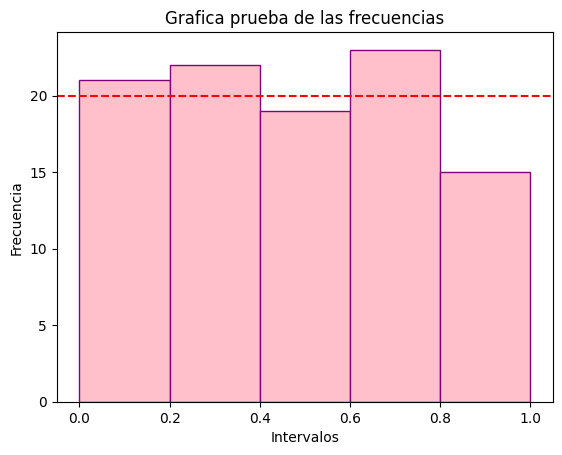

In [19]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0] # es nuestro n numero de subintervalos

plt.figure()
plt.hist(data, bins=bins, color="pink", edgecolor="purple")
plt.axhline(20, linestyle='--', color="red")  # densidad teórica U(0,1)    #Trazamos una linea donde marque el 20 ya que tenemos 100 datos en nuestra imagen y son 5 intervalos en los que estamos partiendo la muestra por es es 20
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia")
plt.title("Gráfica prueba de las frecuencias")
plt.show()